In [39]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [40]:
#Read the dataset
df = pd.read_csv(r"C:\Users\ANJALI S RAJAN\Desktop\titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
#dropping a few features to make it easier to analyze the data 
#and demonstrate the capabilities of the pivot_table function:


In [42]:
df.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# Building a Pivot Table using Pandas


Time to build a pivot table in Python using the awesome Pandas library! We will explore the different facets of a pivot table in this article and build an awesome, flexible pivot table from scratch.

 

How to group data using index in a pivot table?
pivot_table requires a data and an index parameter
data is the Pandas dataframe you pass to the function
index is the feature that allows you to group your data. The index feature will appear as an index in the resultant table
I will be using the ‘Sex’ column as the index for now:


In [43]:
#a single index(Sex)
table = pd.pivot_table(data=df,index=['Sex'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


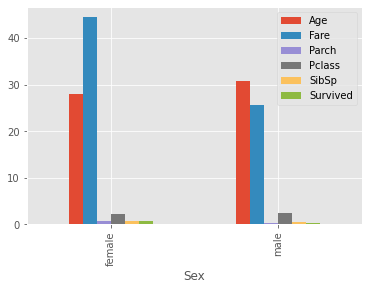

In [44]:
#Plotting the findings
table.plot(kind='bar');

In [45]:
#a single index
table = pd.pivot_table(data=df,index=['Embarked'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Embarked,,,,,,
C,30.814769,59.954144,0.363095,1.886905,0.386905,0.553571
Q,28.089286,13.276030,0.168831,2.909091,0.428571,0.389610
S,29.445397,27.079812,0.413043,2.350932,0.571429,0.336957


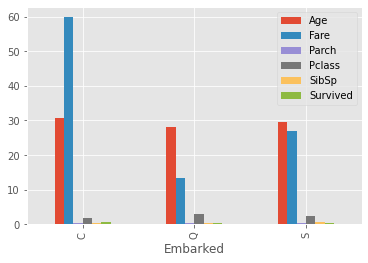

In [46]:
table.plot(kind='bar');

In [47]:
#We can also use more than one index to group our data
# pivot with a multi-index

In [48]:
#multiple indexes
table = pd.pivot_table(df,index=['Sex','Pclass'])
table

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

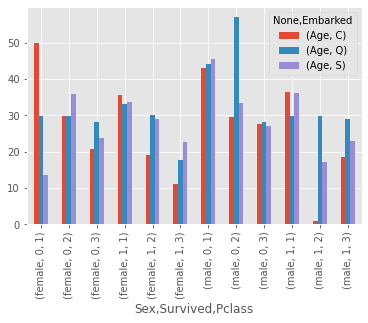

In [56]:
table.plot(kind='bar');

# Different aggregation function for different features
The values shown in the table are the result of the summarization that aggfunc applies to the feature data. aggfunc is an aggregate function that pivot_table applies to your grouped data.

By default, it is np.mean(), but you can use different aggregate functions for different features too! Just provide a dictionary as an input to the aggfunc parameter with the feature name as the key and the corresponding aggregate function as the value.

I will be using np.mean() for the ‘Age’ feature and np.sum() for the ‘Survived’ feature:

In [63]:
#different aggregate functions
table = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.median,'Survived':np.sum})
table

Age  Survived
Sex    Pclass                
female 1       35.0        91
       2       28.0        70
       3       21.5        72
male   1       40.0        45
       2       30.0        17
       3       25.0        47

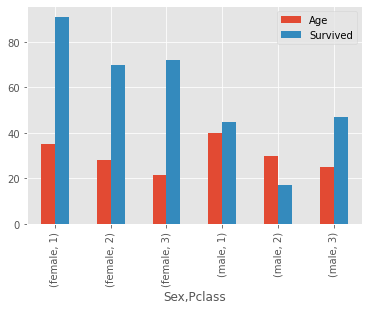

In [64]:
table.plot(kind='bar');

# Aggregate on specific features with values parameter
But what are you aggregating on? You can tell Pandas the feature(s) to apply the aggregate function on, in the value parameter.

value parameter is where you tell the function which features to aggregate on. It is an optional field and if you don’t specify this value, then the function will aggregate on all the numerical features of the dataset:


In [50]:
table = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean)
table

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

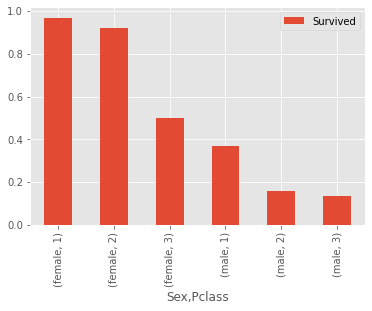

In [51]:
#Plotting using a bargraph
table.plot(kind='bar');

# Find the relationship between features with columns parameter
Using multiple features as indexes is fine, but using some features as columns will help you to intuitively understand the relationship between them. Also, the resultant table can always be better viewed by incorporating the columns parameter of the pivot_table.

This columns parameter is optional and displays the values horizontally on the top of the resultant table.

Both columns and the index parameters are optional, but using them effectively will help you to intuitively understand the relationship between the features.

In [52]:
#columns
table = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

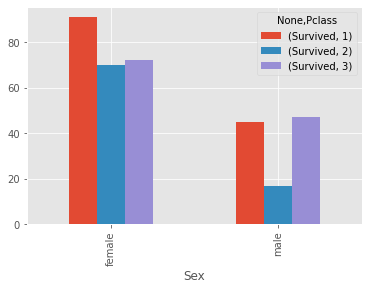

In [53]:
table.plot(kind='bar');

# Handling missing data

In [54]:
#display null values
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

In [55]:
#handling null values
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333

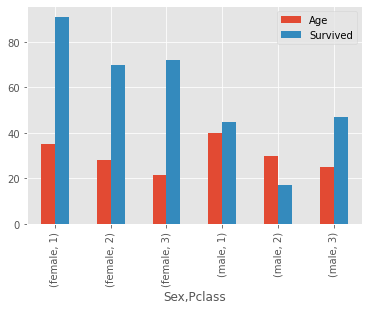

In [65]:
table.plot(kind='bar');